# Simulation of the Particle Trajectory 
   **by Peiji Tang**


Put a particle into electric and magnetic field, this particle's trajectory will doominated by Lorentz force and electric force:

$$q\vec{E} + q\vec{v}\times\vec{B} = \vec{F}\quad\quad(1)$$

$q$ stands for particle charge, $\vec{E}$ and $\vec{B}$ means electric field and magnectic field respectively, $\vec{v}$ indicates particle velocity. Recall Newton's second law:

$$\vec{F} = m\vec{a}\quad\quad(2)$$

$m$ is the mass of an single particle.

Let's rewrite all these vector varaiables into:

$$\vec{E} = E_x\vec{i} + E_y\vec{j} + E_z\vec{k}\quad\quad(2)$$

$$\vec{v} = v_x\vec{i} + v_y\vec{j} + v_z\vec{k}\quad\quad(3)$$

$$\vec{a} = a_x\vec{i} + a_y\vec{j} + a_z\vec{k}\quad\quad(4)$$

$$\vec{B} = B_x\vec{i} + B_y\vec{j} + B_z\vec{k}\quad\quad(5)$$

Base on given condition, $E_x = 1000 \space V/m \space and \space E_y = E_z = 0$, $B_z = 0.1 \space T \space \space \space B_x = B_y = 0.$ 

Then the next step is to calculate magnetic force $q\vec{v}\times\vec{B}$:

$$q\begin{vmatrix}\vec{i} & \vec{j} & \vec{k}\\v_x & v_y &  v_z\\0 & 0 & B_z \end{vmatrix} = qv_yB_z\vec{i}- qv_xB_z\vec{j}\quad\quad(6)$$

Enough information obtained, acceleration can be derived:

$$a_x = \frac{q}{m}v_yB_z + \frac{q}{m}E_x\quad\quad(7)$$

The direction of electric force for electron is opposite to electric field

$$a_y = -\frac{q}{m}v_xB_z\quad\quad(8)$$

$$a_z = 0\quad\quad(9)$$

Based on central spatial scheme, I got:

$$a^n_x = \frac{x^{n+1}-2x^n+x^{n-1}}{{dt}^2}\quad\quad(10)$$

$$a^n_y = \frac{y^{n+1}-2y^n+y^{n-1}}{{dt}^2}\quad\quad(11)$$

$$a^n_z = \frac{z^{n+1}-2z^n+z^{n-1}}{{dt}^2}\quad\quad(12)$$

$$v^n_x = \frac{x^{n+1} - x^{n-1}}{2dt}\quad\quad(13)$$

$$v^n_y = \frac{y^{n+1} - y^{n-1}}{2dt}\quad\quad(14)$$

$$v^n_z = \frac{z^{n+1} - z^{n-1}}{2dt}\quad\quad(15)$$

Replace $a_x^n$ in equation (10) with equation (7) and equation (14):

$$\frac{x^{n+1}-2x^n+x^{n-1}}{{dt}^2} = \frac{qB}{m}\Big(\frac{y^{n+1}-y^{n-1}}{2dt} \Big) +\frac{q}{m}E\quad\quad(16)$$

Similarly replace $a_y^n$ in equation (11) with equation (8) and equation (13):

$$\frac{y^{n+1}-2y^n+y^{}}{{dt}^2} = -\frac{qB}{m}\Big(\frac{x^{n+1}-x^{n-1}}{2dt}\Big)\quad\quad(17)$$

What this scheme needed is $x^{n+1}$ and $y^{n+1}$

$$x^{n+1} = 2x^n - x^{n-1} + \frac{qBdt}{2m}(y^{n+1}-y^{n-1})+\frac{qE{dt^2}}{m}\quad\quad(18)$$

$$y^{n+1} = 2y^n - y^{n-1}-\frac{qBdt}{2m}(x^{n+1}-x^{n-1})\quad\quad(19)$$

The coefficient looks a lit bit complicated so let me define $k_1 = \frac{qBdt}{2m}$ and $k_2 = \frac{qEdt^2}{m}$ then (18), (19) become:

$$x^{n+1} = 2x^n - x^{n-1} + k_1(y^{n+1}-y^{n-1})+k_2\quad\quad(20)$$

$$y^{n+1} = 2y^n - y^{n-1} - k_1(x^{n+1}-x^{n-1})\quad\quad(21)$$

Let (20) + $k_1$(21) to cancel out $y^{n+1}$ and $x^{n+1}$ obtained:

$$x^{n+1} = \frac{1}{1+{k_1}^2}[2x^n-x^{n-1}-k_1y^{n-1}+k_2+2k_1y^n-k_1y^{n-1}+{k_1}^2x^{n-1}]\quad\quad(22)$$

Let (21) - $k_1$(20) to cancel out $x^{n+1}$ and $y^{n+1}$ attained:

$$y^{n+1} = \frac{1}{1+{k_1}^2}[2y^n-y^{n-1}+k_1x^{n-1}-2k_1x^n+k_1x^{n-1}+{k_1}^2y^{n-1}-k_1k_2]\quad\quad(23)$$

let $k_3 = \frac{1}{1+{k_1}^2}$ (22), (23) become:

$$x^{n+1} = k_3[2x^n-x^{n-1}-k_1y^{n-1}+k_2+2k_1y^n-k_1y^{n-1}+{k_1}^2x^{n-1}]\quad\quad(24)$$

$$y^{n+1} = k_3[2y^n-y^{n-1}+k_1x^{n-1}-2k_1x^n+k_1x^{n-1}+{k_1}^2y^{n-1}-k_1k_2]\quad\quad(25)$$

Derivation ended up with two final equations (24) and (25).



In [253]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from mpl_toolkits.mplot3d import Axes3D

In [254]:
def Electron_Tr(dt,nt,E,B,q,m):
    """
    dt ---- time step size
    nt ---- number of steps
    E ---- electric field
    B ---- magnetic field
    q ---- electron charge
    m ---- electron mass 
    
    """
    # discretize time:
    nt = nt+1
    t = numpy.linspace(0.0,(nt-1)*dt,nt) #100 steps, 101 points
    # list the initial position:
    x_0 = 0.0
    y_0 = 0.0
    z_0 = 0.0
    
    # list initial velocity
    vx_0 = 10.0**5
    vy_0 = 2*10.0**5
    vz_0 = 1.5*10.0**5
    
    # create arrays for distance and velocity
    x = numpy.zeros((nt,1))
    y  = numpy.zeros((nt,1))
    z = t*vz_0
    vx = numpy.zeros((nt,1))
    vy = numpy.zeros((nt,1))
    vz = numpy.ones((nt,1))*vz_0
    
    # put initial condition into array:
    x[0] = x_0
    y[0] = y_0
    z[0] = z_0
    vx[0] = vx_0
    vy[0] = vy_0
    vz[0] = vz_0
    
    # according to scheme, x[1] and y[1] cannot be calculated, so here euler method is needed to get them:
    x[1] = x[0] + vx[0]*dt
    y[1] = y[0] + vy[0]*dt
    
    #calculate the coefficient k1, k2, k3:
    k1 = q*B*dt/(2*m)
    k2 = q*E*dt**2/m
    k3 = 1/(1+k1**2)
    
    #Apply for-loop to calculate distance and velocity based on leapfrog scheme:
    for i in range(1,nt-1):
        #calculate distance:
        x[i+1] = k3*(2*x[i]-x[i-1]-k1*y[i-1]+k2+2*k1*y[i]-k1*y[i-1]+k1**2*x[i-1])
        y[i+1] = k3*(2*y[i] - y[i-1]+k1*x[i-1]-2*k1*x[i]+k1*x[i-1]+k1**2*y[i-1]-k1*k2)
        
        #calculate velocity:
        vx[i] = (x[i+1]-x[i-1])/(2*dt)
        vy[i] = (y[i+1]-y[i-1])/(2*dt)
        
    #velocity at 100 time step cannot be computed with given scheme,use euler method:
    vx[nt-1] = (x[nt-1]-x[nt-2])/dt
    vy[nt-1] = (y[nt-1]-y[nt-2])/dt
    
    # calclulate the velocity which combined vx, vy, vz
    v = numpy.sqrt(vx**2+vy**2+vz**2)
    
    
    return x,y,z,vx,vy,vz,v

In [255]:
# given condition:
dt = 10**-11
nt = 100
B = 0.1
E = 1000.0
m = 9.109*10**-31
q = -1.602*10**-19

In [256]:
# using given condition to solve distance and velocity:
#x_e,y_e,z_e indicates the distance of electron in x,y,z-diretion
#vx_e,vy_e,vz_e means electron vecolity in x,y,z-diretion
#v_e shows velocity in 3d which is the combination of vx_e, vy_e, vz_e

x_e,y_e,z_e,vx_e,vy_e,vz_e,v_e = Electron_Tr(dt,nt,E,B,q,m)

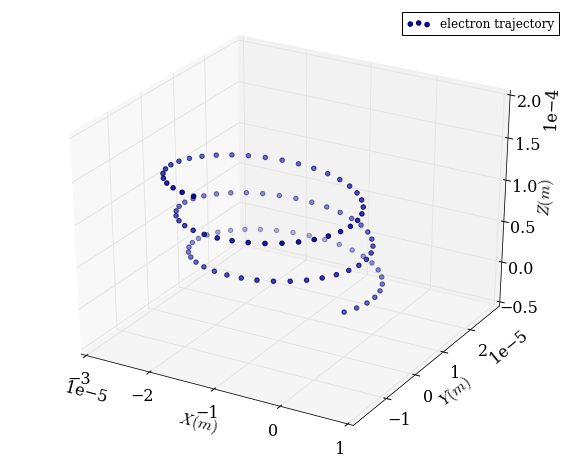

In [287]:
fig = pyplot.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
ax.scatter(x_e, y_e, z_e, label='electron trajectory')
rcParams['legend.fontsize'] = 12
ax.legend()

pyplot.locator_params(nbins=5)
ax.set_xlabel('$X(m)$')
ax.set_ylabel('$Y(m)$')
ax.set_zlabel('$Z(m)$')
pyplot.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
pyplot.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
pyplot.ticklabel_format(style='sci', axis='z', scilimits=(0,0))
pyplot.show()

In [288]:
# After the trajectory and velocity obtained, it is time to answer question:
print('(1) Velocity:')
v_100 = v_e[100][0]  #electron velocity at 100 step
print('At the {} step, the velocity is {:.4f} m/s'.format(nt,v_100))
vx_100 = vx_e[100][0]  #electron velocity x-component at 100 step
print('At the {} step, the component of velocity in the x-direction is {:.4f} m/s.'.format(nt,vx_100))
vy_100 = vy_e[100][0]  #electron velocity y-component at 100 step
print('At the {} step, the component of velocity in the y-direction is {:.4f} m/s.'.format(nt,vy_100))
vz_100 = vz_e[100][0]  #electron velocity z-component at 100 step
print('At the {} step, the component of velocity in the z-direction is {:.4f} m/s.'.format(nt,vz_100))
print(' ')
print(' ')
print('(2) Distance:')
z_100 = z_e[100]  #distance electron moved in z-direction
print('At the {} step, the distance that electron moved in z-direction is {:.8f} m.'.format(nt,z_100))
print('If the intial velocity in x and y-direction were zero, it is clear \
that electron will not affected by Lorentz force which meanselectron will merely \
traveled in z-direction in a line and the distance traveled by electron is still {:.8f} m.'.format(z_100))
print(' ')
print(' ')
print('(3) Larmor radius:')
#velocity which is penperdicular to magnetic field, in this case is the combination of vx, vy  
V_p = numpy.sqrt(vx_100**2+vy_100**2)
omega_c =numpy.abs(q)*B/m    #cyclotron frequency
R_l = V_p/omega_c    #Larmor Radius
print('At the {} step, the Larmor radius is {:.8f} m.'.format(nt,R_l))

(1) Velocity:
At the 100 step, the velocity is 279865.0354 m/s
At the 100 step, the component of velocity in the x-direction is 217951.8361 m/s.
At the 100 step, the component of velocity in the y-direction is -91221.9006 m/s.
At the 100 step, the component of velocity in the z-direction is 150000.0000 m/s.
 
 
(2) Distance:
At the 100 step, the distance that electron moved in z-direction is 0.00015000 m.
If the intial velocity in x and y-direction were zero, it is clear that electron will not affected by Lorentz force which meanselectron will merely traveled in z-direction in a line and the distance traveled by electron is still 0.00015000 m.
 
 
(3) Larmor radius:
At the 100 step, the Larmor radius is 0.00001343 m.


In [289]:
def Ions_Tr(dt,nt,E,B,q,m_a):
    """
    dt ---- time step size
    nt ---- number of steps
    E ---- electric field
    B ---- magnetic field
    q ---- electron charge
    m ---- atomic mass unit 
    
    """
    #mass of Titanium ions:
    m_i = 47.8*m_a
    
    # discretize time:
    nt = nt+1
    t = numpy.linspace(0.0,(nt-1)*dt,nt) #100 steps, 101 points
    # list the initial position:
    x_0 = 0.0
    y_0 = 0.0
    z_0 = 0.0
    
    # list initial velocity
    vx_0 = 1000.0
    vy_0 = 1000.0
    vz_0 = 1000.0
    
    # create arrays for distance and velocity
    x = numpy.zeros((nt,1))
    y  = numpy.zeros((nt,1))
    z = t*vz_0
    vx = numpy.zeros((nt,1))
    vy = numpy.zeros((nt,1))
    vz = numpy.ones((nt,1))*vz_0
    
    # put initial condition into array:
    x[0] = x_0
    y[0] = y_0
    z[0] = z_0
    vx[0] = vx_0
    vy[0] = vy_0
    vz[0] = vz_0
    
    # according to scheme, x[1] and y[1] cannot be calculated, so here euler method is needed to get them:
    x[1] = x[0] + vx[0]*dt
    y[1] = y[0] + vy[0]*dt
    
    #calculate the coefficient k1, k2, k3:
    k1 = q*B*dt/(2*m_i)
    k2 = q*E*dt**2/m_i
    k3 = 1/(1+k1**2)
    
    #Apply for-loop to calculate distance and velocity based on leapfrog scheme:
    for i in range(1,nt-1):
        #calculate distance:
        x[i+1] = k3*(2*x[i]-x[i-1]-k1*y[i-1]+k2+2*k1*y[i]-k1*y[i-1]+k1**2*x[i-1])
        y[i+1] = k3*(2*y[i] - y[i-1]+k1*x[i-1]-2*k1*x[i]+k1*x[i-1]+k1**2*y[i-1]-k1*k2)
        
        #calculate velocity:
        vx[i] = (x[i+1]-x[i-1])/(2*dt)
        vy[i] = (y[i+1]-y[i-1])/(2*dt)
        
    #velocity at 100 time step cannot be computed with given scheme,use euler method:
    vx[nt-1] = (x[nt-1]-x[nt-2])/dt
    vy[nt-1] = (y[nt-1]-y[nt-2])/dt
    
    # calclulate the velocity which combined vx, vy, vz
    v = numpy.sqrt(vx**2+vy**2+vz**2)
    
    
    return x,y,z,vx,vy,vz,v

In [290]:
# for Titanium ions only mass and step size changed, other conditions still the same
# Ions have the postitive charge
m_a = 1.661*10**-27
dt = 10**-5
q = numpy.abs(q)

In [291]:
# based on given contion compute the trajectory and velocity of ions
x_i,y_i,z_i,vx_i,vy_i,vz_i,v_i = Ions_Tr(dt,nt,0.1,0.01,q,m_a)

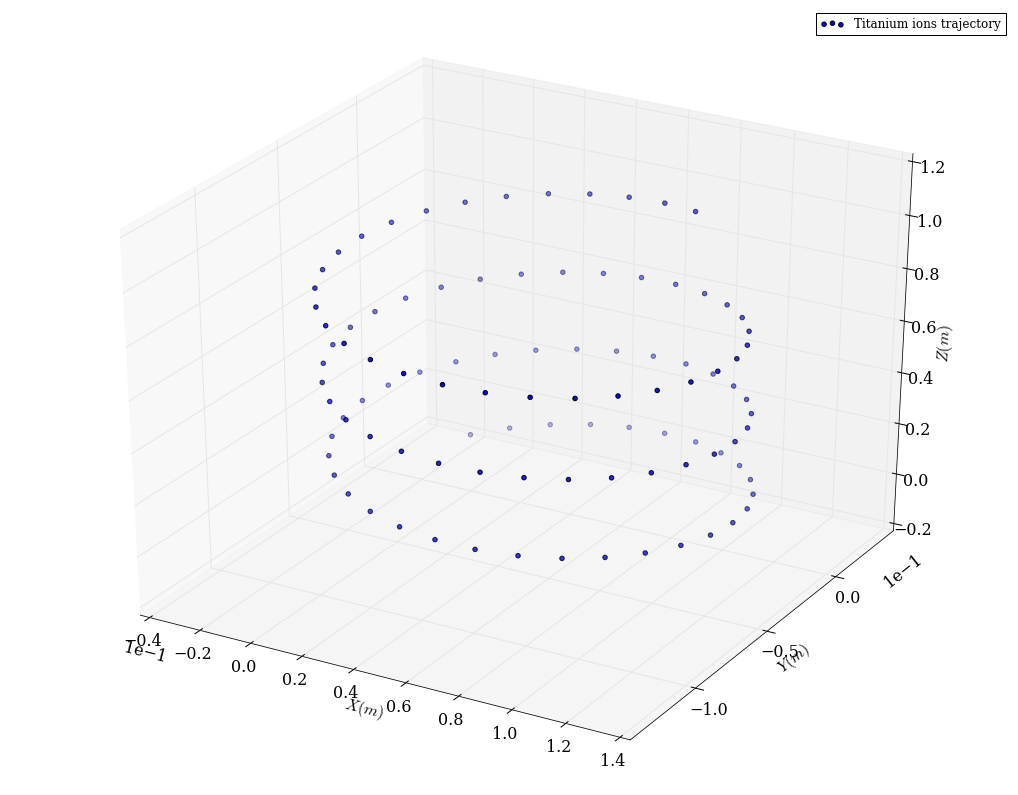

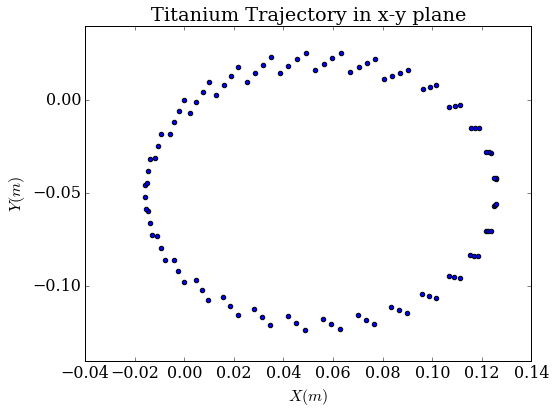

In [292]:
fig = pyplot.figure(figsize=(18,14))
ax = fig.gca(projection='3d')
ax.scatter(x_i, y_i, z_i, label='Titanium ions trajectory')
rcParams['legend.fontsize'] = 12
ax.legend()
ax.set_xlabel('$X(m)$')
ax.set_ylabel('$Y(m)$')
ax.set_zlabel('$Z(m)$')
pyplot.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
pyplot.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
pyplot.ticklabel_format(style='sci', axis='z', scilimits=(0,0))
pyplot.show()

pyplot.figure(figsize=(8,6))
pyplot.scatter(x_i,y_i)
pyplot.xlabel('$X(m)$')
pyplot.ylabel('$Y(m)$')
pyplot.title('Titanium Trajectory in x-y plane')

In [293]:
# After the trajectory and velocity obtained, it is time to answer question:
print('(1) Velocity:')
v_100 = v_i[100][0]  #ion velocity at 100 step
print('At the {} step, the velocity is {:.4f} m/s'.format(nt,v_100))
vx_100 = vx_i[100][0]  #ion velocity x-component at 100 step
print('At the {} step, the component of velocity in the x-direction is {:.4f} m/s.'.format(nt,vx_100))
vy_100 = vy_i[100][0]  #ion velocity y-component at 100 step
print('At the {} step, the component of velocity in the y-direction is {:.4f} m/s.'.format(nt,vy_100))
vz_100 = vz_i[100][0]  #ion velocity z-component at 100 step
print('At the {} step, the component of velocity in the z-direction is {:.4f} m/s.'.format(nt,vz_100))
print(' ')
print(' ')
print('(2) Distance:')
z_100 = z_i[100]  #distance electron moved in z-direction
print('At the {} step, the distance that electron moved in z-direction is {:.8f} m.'.format(nt,z_100))
print('If the intial velocity in x and y-direction were zero, it is clear \
that ion will not affected by Lorentz force which meansion will merely \
traveled in z-direction in a line and the distance traveled by ion is still {:.8f} m.'.format(z_100))
print(' ')
print(' ')
print('(3) Larmor radius:')
#velocity which is penperdicular to magnetic field, in this case is the combination of vx, vy  
V_p = numpy.sqrt(vx_100**2+vy_100**2)
omega_c =q*B/(47.8*m_a)    #cyclotron frequency
R_l = V_p/omega_c    #Larmor Radius
print('At the {} step, the Larmor radius is {:.8f} m.'.format(nt,R_l))

(1) Velocity:
At the 100 step, the velocity is 1740.0391 m/s
At the 100 step, the component of velocity in the x-direction is 1370.4425 m/s.
At the 100 step, the component of velocity in the y-direction is -386.8121 m/s.
At the 100 step, the component of velocity in the z-direction is 1000.0000 m/s.
 
 
(2) Distance:
At the 100 step, the distance that electron moved in z-direction is 1.00000000 m.
If the intial velocity in x and y-direction were zero, it is clear that ion will not affected by Lorentz force which meansion will merely traveled in z-direction in a line and the distance traveled by ion is still 1.00000000 m.
 
 
(3) Larmor radius:
At the 100 step, the Larmor radius is 0.00705734 m.
